In [ ]:
! pip install pandas matplotlib seaborn wordcloud nltk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.util import ngrams
import numpy as np

# Ensure necessary resources are available
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
# Load CSV file
file_path = "data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Remove missing values
df.dropna(subset=['Feedback', 'Sentiment'], inplace=True)

# Convert Sentiment to lowercase (standardizing)
df['Sentiment'] = df['Sentiment'].str.lower()


📊 Displaying Pie Chart: Sentiment Distribution


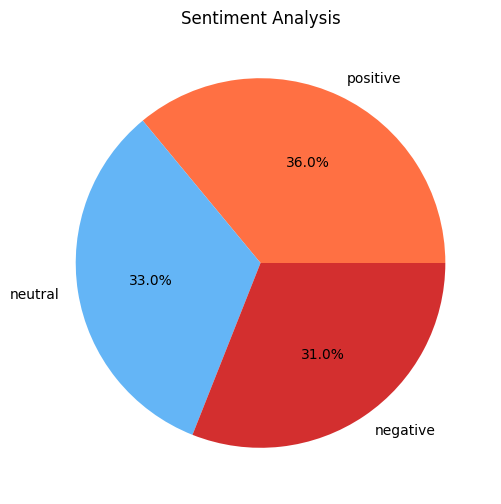

In [15]:
# 📌 Pie Chart: Sentiment Analysis
print("\n📊 Displaying Pie Chart: Sentiment Distribution")
plt.figure(figsize=(6, 6))
colors = ['#ff7043', '#64b5f6', '#d32f2f']  # Colors for Positive, Neutral, Negative
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title("Sentiment Analysis")
plt.ylabel("")  # Hide Y label
plt.show()


🌥️ Displaying Word Cloud for All Feedback


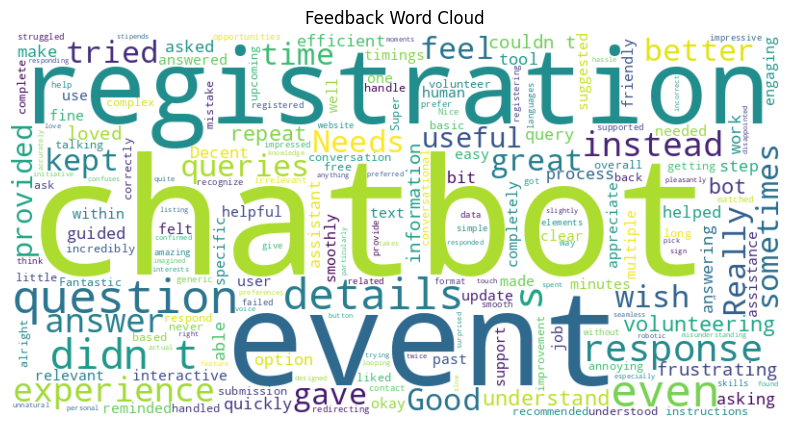

In [16]:
# 📌 Word Cloud for all feedback
print("\n🌥️ Displaying Word Cloud for All Feedback")
text = " ".join(df['Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Feedback Word Cloud")
plt.show()


🌥️ Displaying Word Cloud for Positive Sentiment


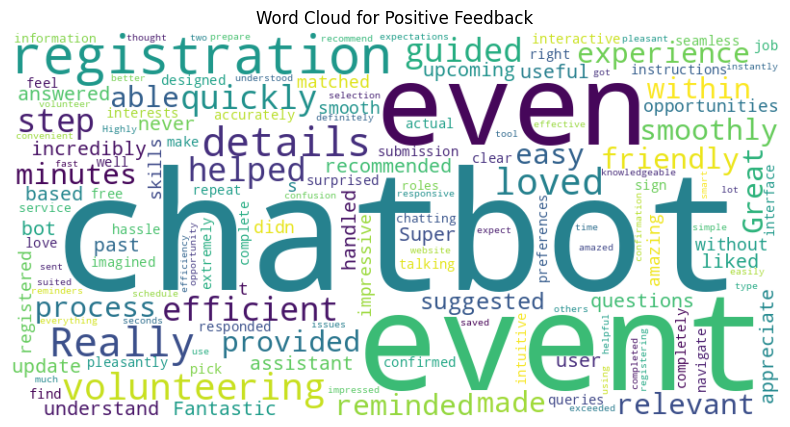


🌥️ Displaying Word Cloud for Neutral Sentiment


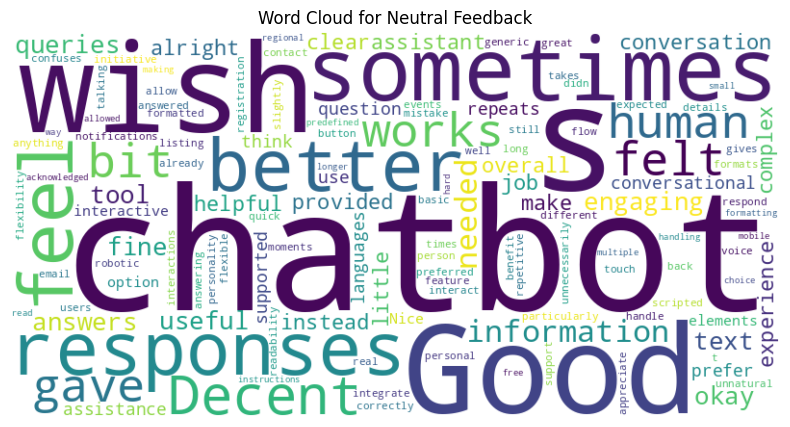


🌥️ Displaying Word Cloud for Negative Sentiment


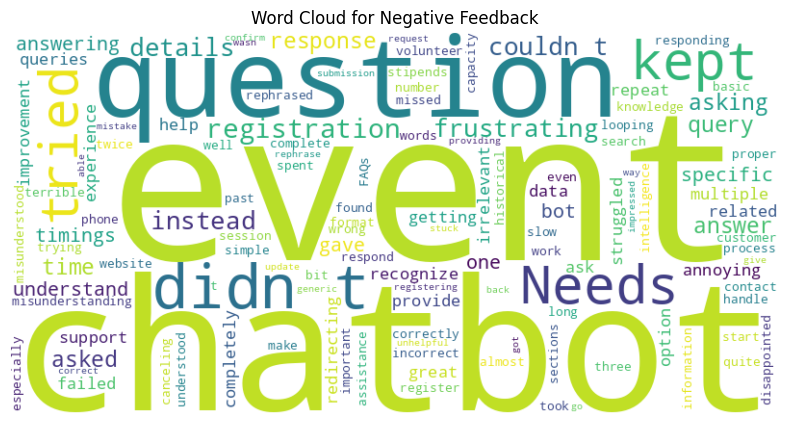


📊 Displaying Bar Chart: Sentiment Distribution


C:\Users\parth\AppData\Local\Temp\ipykernel_20720\668028334.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette="Oranges_r", order=df['Sentiment'].value_counts().index)


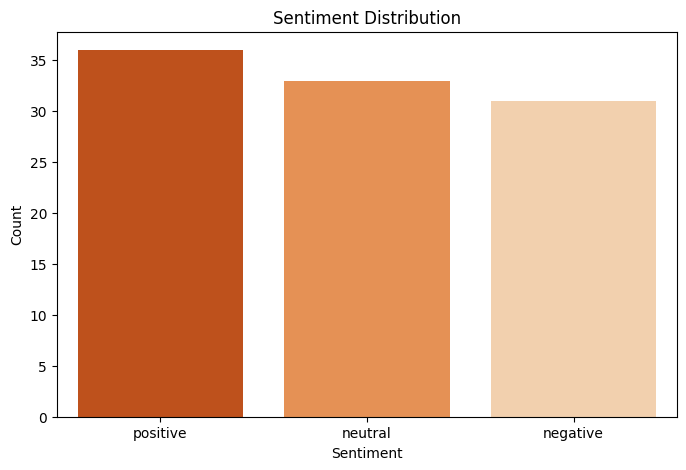

In [17]:
# 📌 Word Clouds for each sentiment
for sentiment in df['Sentiment'].unique():
    print(f"\n🌥️ Displaying Word Cloud for {sentiment.capitalize()} Sentiment")
    sentiment_text = " ".join(df[df['Sentiment'] == sentiment]['Feedback'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(sentiment_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment.capitalize()} Feedback")
    plt.show()

# 📌 Bar Chart: Sentiment Distribution
print("\n📊 Displaying Bar Chart: Sentiment Distribution")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', palette="Oranges_r", order=df['Sentiment'].value_counts().index)
plt.title("Sentiment Distribution")
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.show()


📏 Displaying Box Plot: Feedback Length by Sentiment


C:\Users\parth\AppData\Local\Temp\ipykernel_20720\3672419109.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Feedback Length', palette="Oranges")


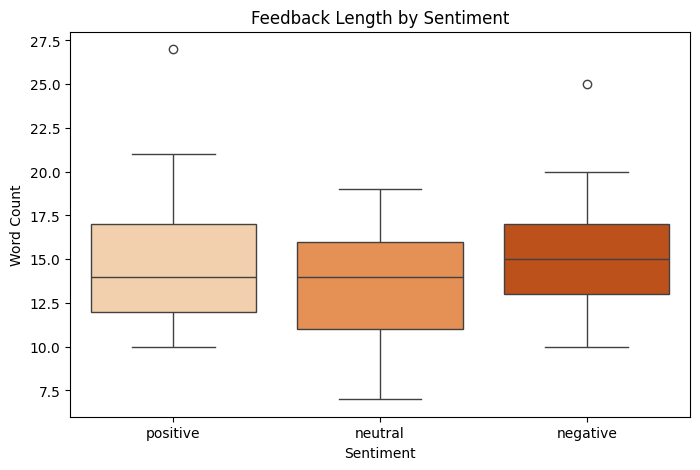

In [18]:
# 📌 Box Plot: Feedback Length by Sentiment
df['Feedback Length'] = df['Feedback'].apply(lambda x: len(x.split()))

print("\n📏 Displaying Box Plot: Feedback Length by Sentiment")
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sentiment', y='Feedback Length', palette="Oranges")
plt.title("Feedback Length by Sentiment")
plt.ylabel("Word Count")
plt.xlabel("Sentiment")
plt.show()


📝 Displaying Bar Chart: Most Common Bigrams in Feedback


C:\Users\parth\AppData\Local\Temp\ipykernel_20720\1406990732.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bigram_counts), y=[" ".join(pair) for pair in bigram_labels], palette="Oranges_r")


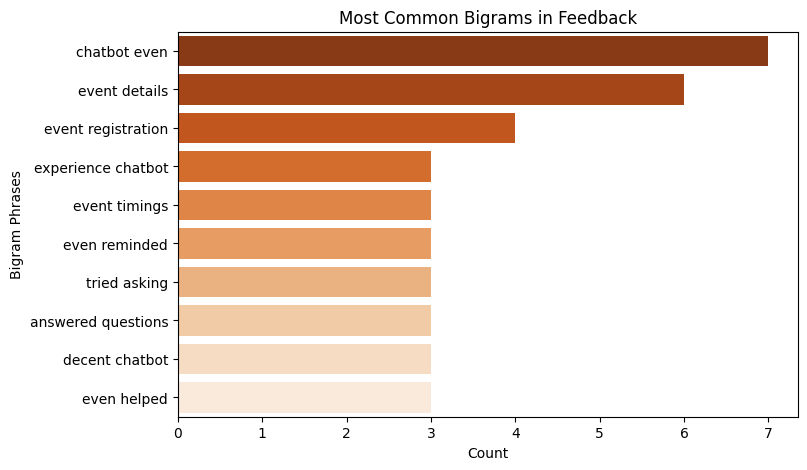

In [19]:
# 📌 Function to generate common n-grams (bigram, trigram)
def generate_ngrams(text_series, n=2):
    stop_words = set(stopwords.words('english'))
    words = " ".join(text_series).lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalnum() and word not in stop_words]
    n_grams = list(ngrams(words, n))
    return Counter(n_grams).most_common(10)

# 📌 Plot bigrams (Most Common Phrases)
print("\n📝 Displaying Bar Chart: Most Common Bigrams in Feedback")
bigrams = generate_ngrams(df['Feedback'], 2)
bigram_labels, bigram_counts = zip(*bigrams)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(bigram_counts), y=[" ".join(pair) for pair in bigram_labels], palette="Oranges_r")
plt.title("Most Common Bigrams in Feedback")
plt.xlabel("Count")
plt.ylabel("Bigram Phrases")
plt.show()
